## SkillCraft Technology Internship Task 3

## Introduction
Welcome to my third task as an intern at SkillCraft Technology! In this task, I implemented a Support Vector Machine (SVM) to classify images of cats and dogs. The dataset used for this task is sourced from Kaggle's popular "Dogs vs. Cats" dataset.

## Dataset
The dataset for this task can be found on Kaggle at the following link:[Dogs vs. Cats Dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

## GitHub Repository
[SkillCraft_Technology_Task3](https://github.com/Tribhuwansingh2023/SkillCraft-Technology-Internship-Projects)

## LinkedIn Post
[My LinkedIn post](https://www.linkedin.com/posts/tribhuwan-singh-877406330_internship-skillcrafttechnology-machinelearning-activity-7246352099859472384-6PFJ?utm_source=share&utm_medium=member_desktop)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

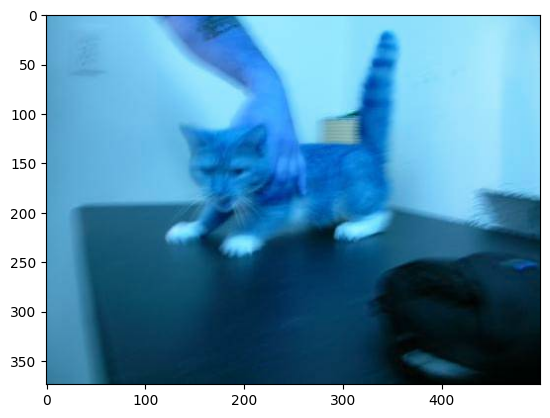

cat


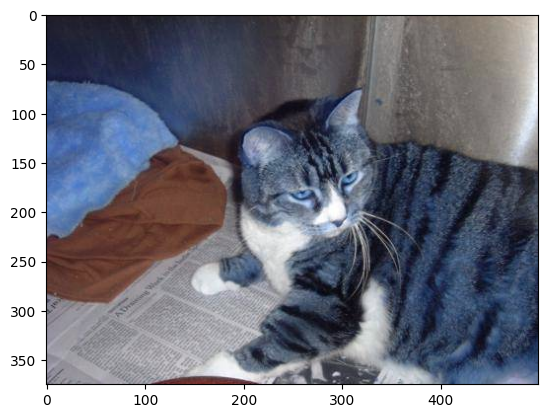

cat


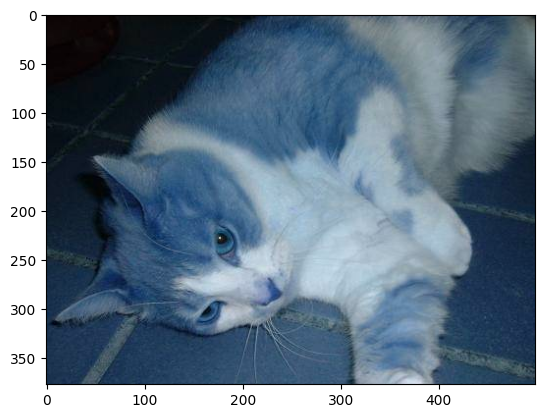

cat


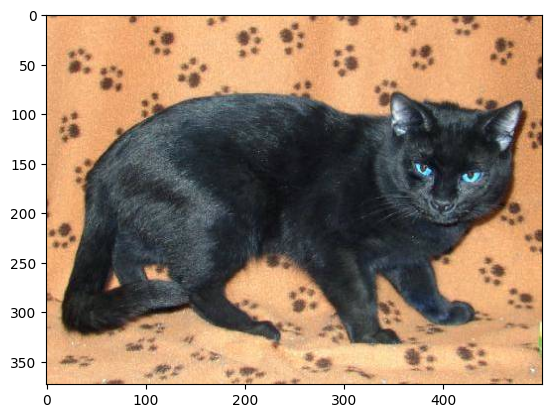

cat


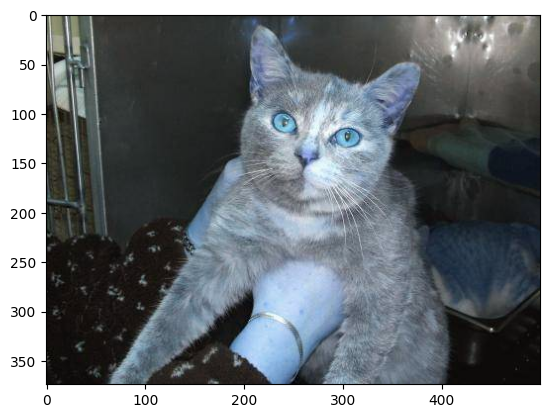

cat


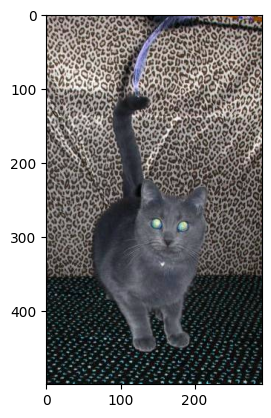

cat


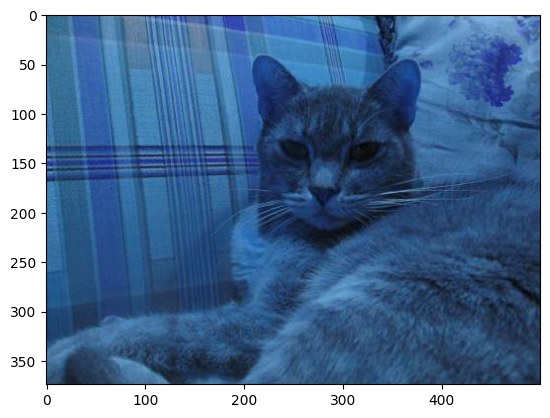

cat


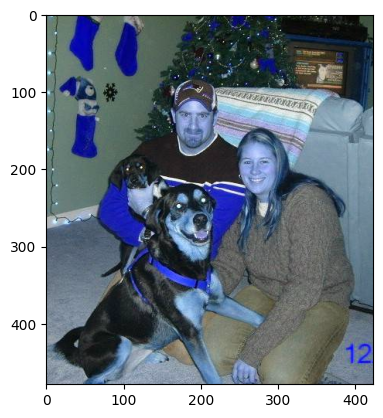

dog


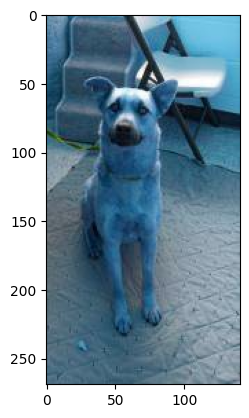

dog


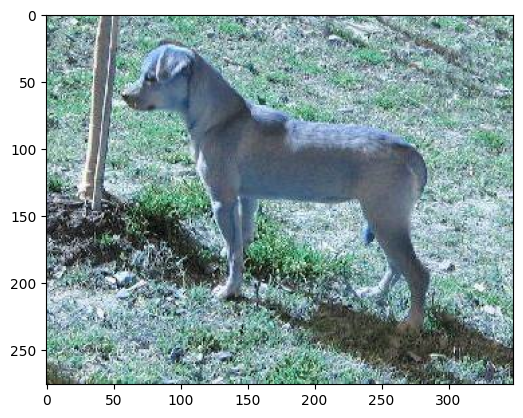

dog


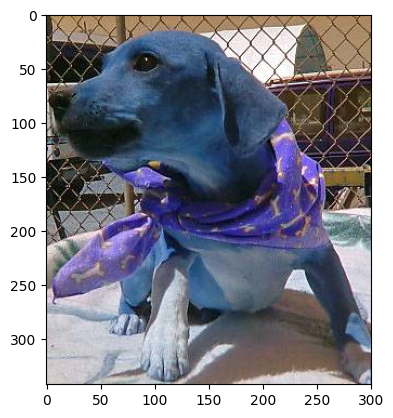

dog


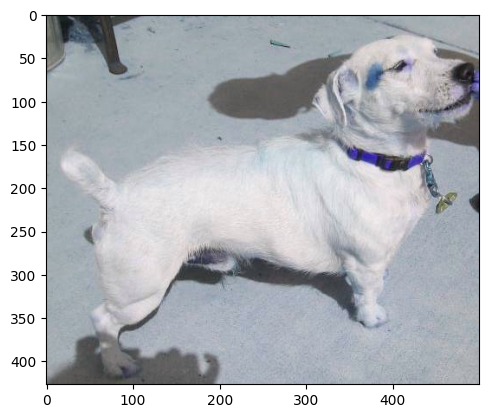

dog


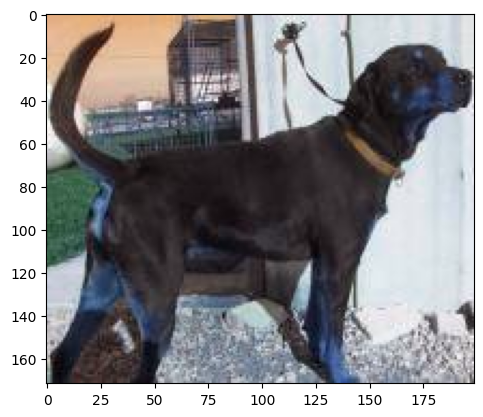

dog


In [2]:
# Display 10 images
DATA_DIR = "D:/git/SkillCraft Technology-ML/Dog vs Cat Classification/train/train"
for file_name in os.listdir(DATA_DIR)[0:25000:2000]:
    img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
    plt.imshow(img_array)
    plt.show()
    print(file_name.split('.')[0])

In [3]:
#create data
DATA_DIR = "D:/git/SkillCraft Technology-ML/Dog vs Cat Classification/train/train"
IMG_SIZE = 28
def create_data():
    x = []
    y = []
    for file_name in os.listdir(DATA_DIR):
        img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        x.append(new_array)
        if file_name.split('.')[0] == 'cat':
            y.append(0)
        else:
            y.append(1)
    return x, y

In [4]:
import random
x, y = create_data()
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(25000, 28, 28, 3)
(25000,)


In [5]:
X_train = x / 255.0
Y_train = to_categorical(y, num_classes = 2)

In [6]:
print(X_train.shape)
print(Y_train.shape)

(25000, 28, 28, 3)
(25000, 2)


In [7]:
import keras
from keras import regularizers
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D  
from keras.utils import to_categorical  
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import matplotlib.pyplot as plt

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)  # Corrected argument
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

c:\Users\91968\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\91968\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
model.fit(x=X_train,
          y=Y_train, epochs=100, validation_split=0.1)

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 116s 154ms/step - accuracy: 0.5942 - loss: 1.1558 - val_accuracy: 0.5152 - val_loss: 1.0043
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 151s 167ms/step - accuracy: 0.7343 - loss: 0.5900 - val_accuracy: 0.7860 - val_loss: 0.5016
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 175s 214ms/step - accuracy: 0.7815 - loss: 0.5164 - val_accuracy: 0.7172 - val_loss: 0.6073
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 186s 190ms/step - accuracy: 0.8098 - loss: 0.4730 - val_accuracy: 0.6944 - val_loss: 0.7108
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 112s 159ms/step - accuracy: 0.8293 - loss: 0.4375 - val_accuracy: 0.4188 - val_loss: 1.4825
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 164s 191ms/step - accuracy: 0.8482 - loss: 0.4079 - val_accuracy: 0.9708 - val_loss: 0.1553
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 115s 164ms/step - accuracy: 0.8548 - loss: 0.3930 - val_accuracy: 0.7244 - val_loss: 0.5978
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 164ms/step - accuracy: 

In [61]:
DATA_DIR = "D:/git/SkillCraft Technology-ML/Dog vs Cat Classification/test1/test1"  
IMG_SIZE = 28  

def create_test_data():  
    x = []  
    for i in range(1, 12501):  
        img_path = os.path.join(DATA_DIR, f"{i}.jpg")  
        img_array = cv2.imread(img_path)  
        if img_array is None:  
            print(f"Warning: Unable to read image file {img_path}. Skipping...")  
            continue  
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
        x.append(new_array)  
    return np.array(x)  

# Predict results  
test = create_test_data()  
test = test / 255.0  
results = model.predict(test)  
print(results.shape)

391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step
(12498, 2)


In [46]:
#create data
#DATA_DIR = "D:/git/SkillCraft Technology-ML/Dog vs Cat Classification/test1/test1"
#IMG_SIZE = 28
#def create_test_data():
 #   x = []
    #for i in range(1,12501):
        #img_array = cv2.imread(os.path.join(DATA_DIR, str(i) + '.jpg'))
        #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
     #   x.append(new_array)
    #return x

In [56]:
# predict results
test = create_test_data()
test = np.array(test) / 255.0
results = model.predict(test)
print(results.shape)

391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step
(12498, 2)


In [64]:
 
print("Shape of results:", results.shape)  

if len(results.shape) == 1:  
      
    results = (results > 0.5).astype(int)  
elif len(results.shape) == 2 and results.shape[1] > 1:  
   
    results = np.argmax(results, axis=1) 

results_series = pd.Series(results, name="label")  
submission = pd.concat([pd.Series(range(1, len(results) + 1), name="id"), results_series], axis=1)  

 
submission.to_csv("D:/git/SkillCraft Technology-ML/Dog vs Cat Classification/sampleSubmission.csv", index=False)  
print("Submission file created successfully.")

Shape of results: (12498,)
Submission file created successfully.


In [70]:
print("Shape of results:", results.shape)  

if len(results.shape) == 1:  
      
    results = (results > 0.5).astype(int)  
elif len(results.shape) == 2 and results.shape[1] > 1:  
   
    results = np.argmax(results, axis=1) 

results_series = pd.Series(results, name="label")  
submission = pd.concat([pd.Series(range(1, len(results) + 1), name="id"), results_series], axis=1)

submission.to_csv("dogs_and_cats.csv", index=False)
print("Submission file created successfully.")  

Shape of results: (12498,)
Submission file created successfully.


In [4]:
# Author - Tribhuwan Singh